In [1]:

try:
    import google.colab
    from google.colab import files
    uploaded = files.upload()
except:
    pass


Saving cleaned_weather.csv to cleaned_weather.csv
Saving weather.csv to weather.csv


# Weather Time Series Analysis and Forecasting


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings("ignore")

here we are cleaning the original dataset and getting the cleaned one

### Data Loading and Initial Preprocessing

This section handles the loading and initial preparation of our weather dataset. The `load_and_prepare_data()` function performs several crucial preprocessing steps:

1. **Data Loading**: Reads the CSV file containing weather measurements from 2020
2. **Date Processing**:
   - Converts the 'date' column to datetime format
   - Sets it as the DataFrame index for time series analysis
3. **Feature Engineering**: Creates new time-based features:
   - Hour of the day
   - Month of the year
   - Day of the month

The function returns a prepared DataFrame ready for analysis, and we display the first few rows to inspect the data structure.

*Note: The seasonal categorization is currently commented out but can be uncommented if seasonal analysis is needed.*

Expected columns in the output:
- Meteorological measurements (T, p, rh, etc.)
- Derived time features (hour, month, day)

In [5]:

original_df = pd.read_csv("Data/weather.csv")
# Define renaming map (remove units, simplify names, drop 'OT')
rename_map = {
    'p (mbar)': 'p',
    'T (degC)': 'T',
    'Tpot (K)': 'Tpot',
    'Tdew (degC)': 'Tdew',
    'rh (%)': 'rh',
    'VPmax (mbar)': 'VPmax',
    'VPact (mbar)': 'VPact',
    'VPdef (mbar)': 'VPdef',
    'sh (g/kg)': 'sh',
    'H2OC (mmol/mol)': 'H2OC',
    'rho (g/m**3)': 'rho',
    'wv (m/s)': 'wv',
    'max. wv (m/s)': 'max. wv',
    'wd (deg)': 'wd',
    'rain (mm)': 'rain',
    'raining (s)': 'raining',
    'SWDR (W/m�)': 'SWDR',
    'PAR (�mol/m�/s)': 'PAR',
    'max. PAR (�mol/m�/s)': 'max. PAR',
    'Tlog (degC)': 'Tlog',
    'OT': None  # Drop this column
}

# Clean the dataset in-memory
cleaned_df = original_df.rename(columns={k: v for k, v in rename_map.items() if v})
cleaned_df = cleaned_df.drop(columns=[k for k, v in rename_map.items() if v is None])

# Convert 'date' to datetime and set as index
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
cleaned_df.set_index('date', inplace=True)

# Add derived time features
cleaned_df['hour'] = cleaned_df.index.hour
cleaned_df['month'] = cleaned_df.index.month
cleaned_df['day'] = cleaned_df.index.day

cleaned_df.head()


,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,...,wd,rain,raining,SWDR,PAR,max. PAR,Tlog,hour,month,day
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,...,224.3,0.0,0.0,0.0,0.0,0.0,11.45,0,1,1
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,...,206.8,0.0,0.0,0.0,0.0,0.0,11.51,0,1,1
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,...,197.1,0.0,0.0,0.0,0.0,0.0,11.60,0,1,1
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,...,206.4,0.0,0.0,0.0,0.0,0.0,11.70,0,1,1
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,...,209.6,0.0,0.0,0.0,0.0,0.0,11.81,0,1,1


here both the datasets are given and the difference is plotted


In [6]:
import pandas as pd

# Load both datasets
original = pd.read_csv("Data/weather.csv")
cleaned = pd.read_csv("Data/cleaned_weather.csv")

# Compare column names
print(" Columns in Original:\n", original.columns.tolist())
print("\n Columns in Cleaned:\n", cleaned.columns.tolist())

# Compare shapes
print(f"\nOriginal shape: {original.shape}")
print(f"Cleaned shape:  {cleaned.shape}")

# Check column differences
set_orig = set(original.columns)
set_clean = set(cleaned.columns)

added = set_clean - set_orig
removed = set_orig - set_clean
print(f"\n Removed Columns: {removed}")
print(f" Added/Updated Columns: {added}")

# Compare sample values
print("\n Sample data from original:")
display(original.head(2))
print("\n Sample data from cleaned:")
display(cleaned.head(2))


 Columns in Original:
 ['date', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m�)', 'PAR (�mol/m�/s)', 'max. PAR (�mol/m�/s)', 'Tlog (degC)', 'OT']

 Columns in Cleaned:
 ['date', 'p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC', 'rho', 'wv', 'max. wv', 'wd', 'rain', 'raining', 'SWDR', 'PAR', 'max. PAR', 'Tlog']

Original shape: (52696, 22)
Cleaned shape:  (52696, 21)

 Removed Columns: {'wv (m/s)', 'Tdew (degC)', 'max. PAR (�mol/m�/s)', 'max. wv (m/s)', 'VPdef (mbar)', 'VPact (mbar)', 'T (degC)', 'sh (g/kg)', 'SWDR (W/m�)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'PAR (�mol/m�/s)', 'rh (%)', 'wd (deg)', 'rain (mm)', 'raining (s)', 'Tlog (degC)', 'OT'}
 Added/Updated Columns: {'p', 'rh', 'H2OC', 'max. PAR', 'max. wv', 'T', 'VPmax', 'Tlog', 'Tp

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0



 Sample data from cleaned:


,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51


### Basic Statistical Analysis

This section calculates fundamental statistical measures for our meteorological data. We'll examine:

**1. Summary Statistics**
Using Pandas' `describe()` function to calculate:
- Central tendency (mean)
- Dispersion (std, min, max)
- Distribution characteristics (25th, 50th, 75th percentiles)

**2. Correlation Analysis**
Computing correlations between all numerical variables to identify:
- Relationships between different weather parameters
- Potential interdependencies in meteorological measurements

The `basic_statistics()` function returns two key components:
- `stats_df`: Summary statistics for each numerical column
- `correlations`: Correlation matrix showing relationships between variables

This gives us our first quantitative insight into the weather patterns and relationships between different meteorological measurements.


Basic Statistics:
                  p             T          Tpot          Tdew            rh  \
count  52696.000000  52696.000000  52696.000000  52696.000000  52696.000000   
mean     989.989233     10.818241    284.796938      5.409105     72.487133   
std        9.207149      7.468671      7.616995      5.956722     19.230260   
min      955.580000     -6.440000    266.190000    -13.810000     21.160000   
25%      984.800000      4.590000    278.550000      0.777500     58.820000   

              VPmax         VPact         VPdef            sh          H2OC  \
count  52696.000000  52696.000000  52696.000000  52696.000000  52696.000000   
mean      14.487046      9.676828      4.810131      6.111159      9.782341   
std        7.632960      4.023504      5.539320      2.561536      4.082684   
min        3.770000      2.090000      0.000000      1.300000      2.090000   
25%        8.480000      6.460000      1.170000      4.070000      6.530000   

                rho            

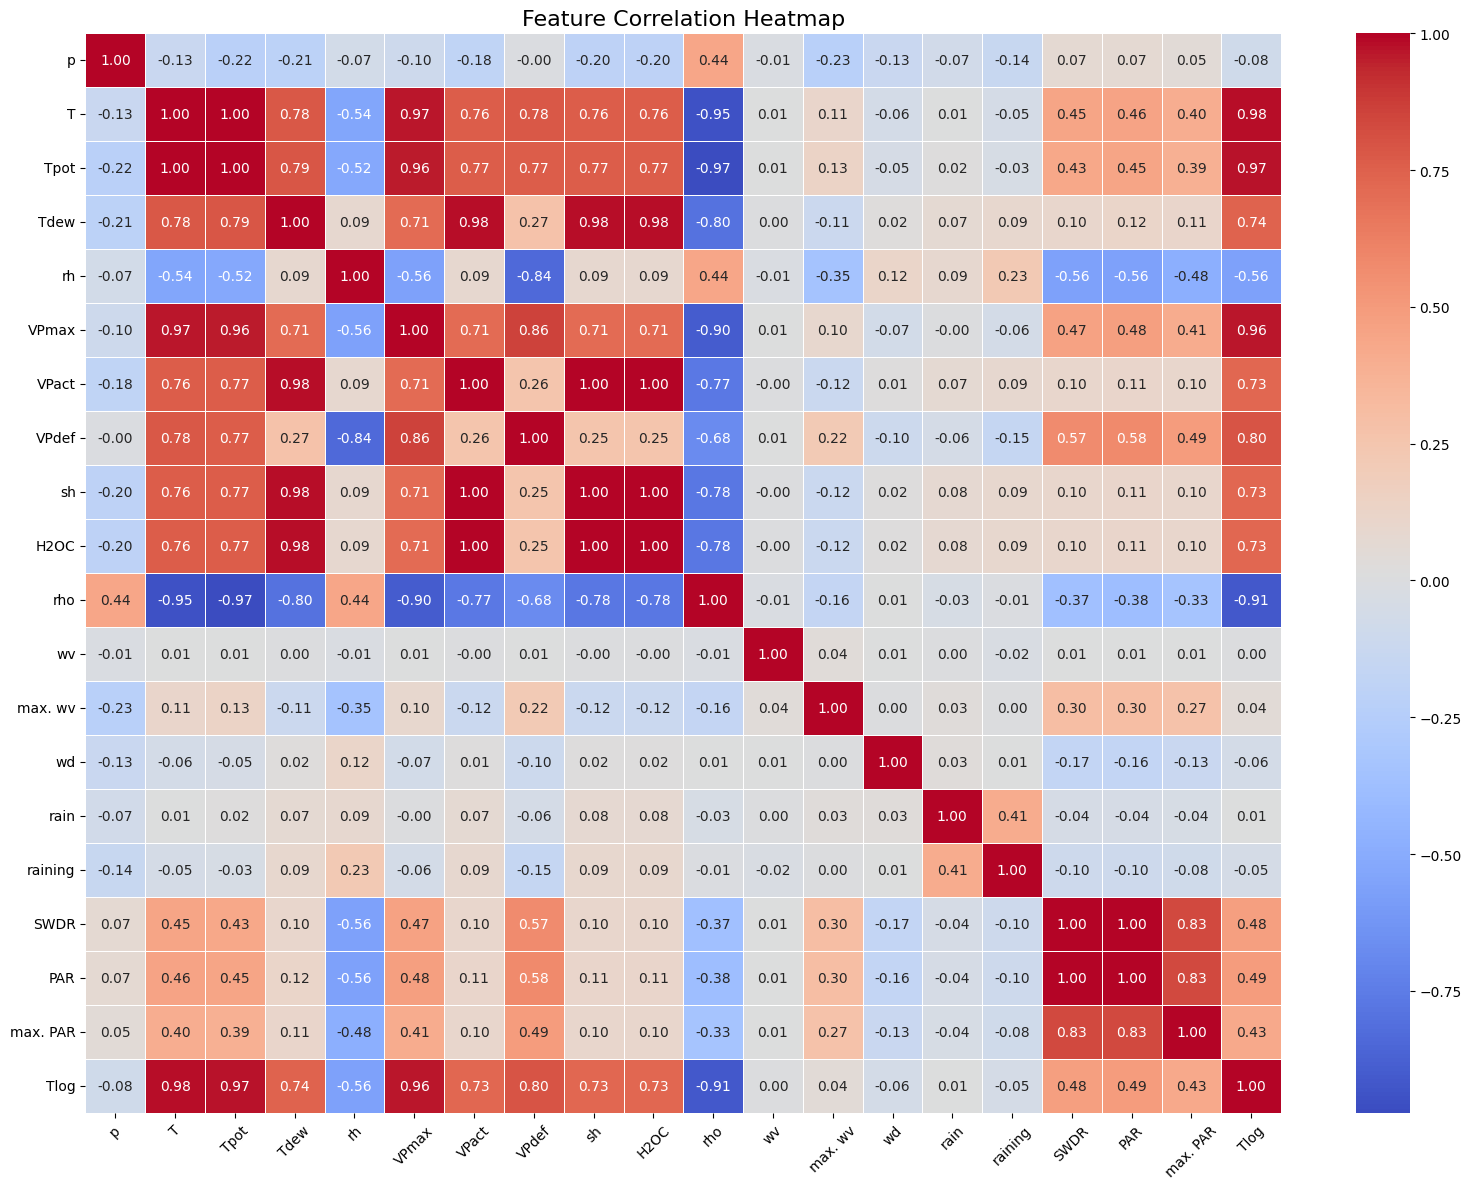

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your DataFrame
df = pd.read_csv('Data/cleaned_weather.csv', parse_dates=['date'])

# 2. (Optional) set the date index if you want your correlation by time-sliced features
if 'date' in df.columns:
    df.set_index('date', inplace=True)

# 3. Compute basic stats & correlations
def basic_statistics(df):
    """
    Calculate basic statistics for numerical columns
    """
    stats_df = df.describe()
    correlations = df.corr()
    return stats_df, correlations

stats_df, correlations = basic_statistics(df)
print("\nBasic Statistics:")
print(stats_df.head())

print("\nCorrelation Matrix:")
print(correlations)

# 4. Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [8]:
def basic_statistics(df):
    """
    Calculate basic statistics for numerical columns
    """
    stats_df = df.describe()
    correlations = df.corr()

    return stats_df, correlations

# Basic statistics
stats_df, correlations = basic_statistics(df)
print("\nBasic Statistics:")
stats_df.head()


Basic Statistics:


,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,1210.882855,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,36.430222,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,1107.380000,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,1183.900000,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000


### Analysis of Daily Weather Patterns

This section aggregates our 10-minute interval data into daily summaries, focusing on key weather parameters:

#### Daily Aggregation Metrics:
1. **Temperature ('T')**:
   - Daily mean temperature
   - Daily minimum temperature
   - Daily maximum temperature (daily temperature range)

2. **Humidity ('rh')**:
   - Mean daily relative humidity

3. **Solar Radiation ('SWDR')**:
   - Total daily solar radiation
   - Indicates daily sun exposure/cloud cover

4. **Precipitation ('rain')**:
   - Total daily rainfall
   - Important for identifying wet vs. dry days

The `analyze_daily_patterns()` function uses Pandas' `resample()` method to convert our high-frequency data into daily statistics, helping us understand day-to-day weather variations and patterns.

In [9]:
def analyze_daily_patterns(df):
    """
    Analyze daily patterns in temperature, humidity, and radiation
    """
    daily_stats = df.resample('D').agg({
        'T': ['mean', 'min', 'max'],
        'rh': 'mean',
        'SWDR': 'sum',
        'rain': 'sum'
    })

    return daily_stats


# Daily patterns
daily_stats = analyze_daily_patterns(df)
print("\nFirst few days of daily statistics:")
daily_stats.head()


First few days of daily statistics:


T                     rh     SWDR rain
                mean   min   max       mean      sum  sum
date                                                     
2020-01-01 -0.514196 -3.46  4.58  86.429301  8250.91  0.0
2020-01-02 -1.056319 -5.78  6.47  80.206042  9570.44  0.0
2020-01-03  4.835278  0.69  8.17  81.975000  1665.99  0.3
2020-01-04  3.784931  1.47  6.61  80.899861  1157.79  4.8
2020-01-05  2.735000  1.47  4.43  76.422639  4572.03  0.0

### Analysis of Extreme Weather Events

This section identifies and analyzes extreme weather conditions throughout the year. Understanding extreme events is crucial for:
- Climate pattern analysis
- Weather-related risk assessment
- Understanding the range of weather variations

#### Extreme Metrics Analyzed:
1. **Temperature Extremes**:
   - Highest recorded temperature
   - Lowest recorded temperature
   - Hottest day (by daily mean temperature)
   - Coldest day (by daily mean temperature)

2. **Wind Conditions**:
   - Maximum wind speed
   - Prevailing wind direction (most frequent)

3. **Precipitation**:
   - Maximum daily rainfall

The `analyze_extreme_events()` function calculates these extremes using various aggregation methods and time scales, from instantaneous measurements (like maximum temperature) to daily aggregates (like maximum daily rainfall).

In [10]:
def analyze_extreme_events(df):
    """
    Identify and analyze extreme weather events
    """
    extremes = {
        'highest_temp': df['T'].max(),
        'lowest_temp': df['T'].min(),
        'highest_wind': df['wv'].max(),
        'max_daily_rain': df.resample('D')['rain'].sum().max(),
        'hottest_day': df.resample('D')['T'].mean().idxmax(),
        'coldest_day': df.resample('D')['T'].mean().idxmin(),
        'prevailing_wind_direction': df.groupby('wd')['wv'].count().idxmax()
    }

    return extremes

# Extreme events
print("\nExtreme weather events:")
extremes = analyze_extreme_events(df)
for event, value in extremes.items():
    print(f"{event}: {value}")


Extreme weather events:
highest_temp: 34.8
lowest_temp: -6.44
highest_wind: 13.77
max_daily_rain: 46.4
hottest_day: 2020-08-08 00:00:00
coldest_day: 2020-01-25 00:00:00
prevailing_wind_direction: 210.3


### Weather Pattern Visualizations

This section creates a comprehensive visual analysis of key weather patterns using multiple plotting techniques. The visualization combines three key perspectives of the weather data into a single figure:

**1. Monthly Temperature Distribution (Box Plot)**
- Shows temperature variation within each month
- Displays median, quartiles, and outliers
- Helps identify seasonal temperature patterns
- Reveals month-to-month temperature variability

**2. Daily Temperature Cycle (Line Plot)**
- Displays average temperature for each hour of the day
- Reveals diurnal temperature patterns
- Shows timing of daily temperature peaks and troughs
- Useful for understanding daily temperature cycles

**3. Monthly Rainfall Totals (Bar Plot)**
- Shows total rainfall accumulation by month
- Identifies wet and dry months
- Reveals seasonal precipitation patterns
- Helps understand annual rainfall distribution

The `plot_weather_patterns()` function uses:
- Seaborn's style for enhanced visualization
- Multiple subplot layout for comparative analysis
- Different plot types appropriate for each metric
- Consistent labeling and sizing

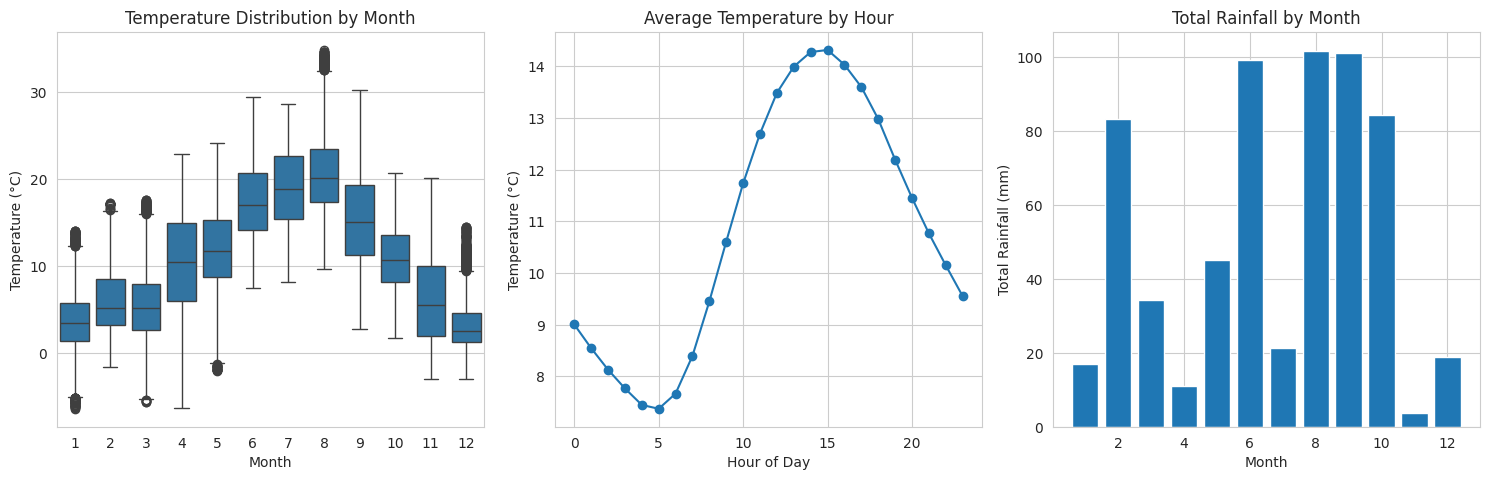

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_weather_patterns(df):
    # Apply Seaborn style
    sns.set_style('whitegrid')

    # Create main figure with three subplots
    fig = plt.figure(figsize=(15, 9))

    # 1) Temperature variation by month
    ax1 = fig.add_subplot(231)
    sns.boxplot(data=df, x='month', y='T', ax=ax1)
    ax1.set_title('Temperature Distribution by Month')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Temperature (°C)')

    # 2) Daily temperature pattern
    ax2 = fig.add_subplot(232)
    hourly_temp = df.groupby('hour')['T'].mean()
    ax2.plot(hourly_temp.index, hourly_temp.values, marker='o')
    ax2.set_title('Average Temperature by Hour')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Temperature (°C)')

    # 3) Rainfall pattern by month
    ax3 = fig.add_subplot(233)
    monthly_rain = df.groupby('month')['rain'].sum()
    ax3.bar(monthly_rain.index, monthly_rain.values)
    ax3.set_title('Total Rainfall by Month')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Total Rainfall (mm)')

    plt.tight_layout()
    return fig

# ————— Load & prepare DataFrame —————
# 1. Read CSV, parsing the date column
df = pd.read_csv(
    'Data/cleaned_weather.csv',
    parse_dates=['date']
)

# 2. Set the datetime index
df.set_index('date', inplace=True)

# 3. Create 'month' and 'hour' columns from the index
df['month'] = df.index.month
df['hour'] = df.index.hour

# ————— Generate & display the plots —————
fig = plot_weather_patterns(df)
plt.show()


### Time Series Forecasting: Setup and Model Imports

1. **Data Preprocessing Tools**:
   - `StandardScaler`: For standardizing features to zero mean and unit variance
   - `MinMaxScaler`: For scaling features to a fixed range (0-1)

2. **Model Evaluation Metrics**:
   - `mean_squared_error`: For measuring prediction accuracy
   - `mean_absolute_error`: For measuring average magnitude of errors
   - `r2_score`: For measuring goodness of fit

4. **Deep Learning Components** (TensorFlow/Keras):
   - `Sequential`: For building the neural network layer by layer
   - `LSTM`: Long Short-Term Memory layers for sequence prediction
   - `Dense`: Regular fully-connected neural network layers
   - `Dropout`: For preventing overfitting
   - `Adam`: Efficient gradient-based optimizer

### Running Weather Predictions with deep learning and machine learning models

#### Prediction Process:

1. **Model Training**:
   - Target variable: Temperature ('T')
   - Uses 24-hour sequence length (previous day)
   - Predicts 24 time steps ahead (full day forecast)
   - Trains for 5 epochs.
   - Features used: Temperature, Relative Humidity, Pressure, Wind Velocity, Solar Radiation
   - Uses MinMaxScaler for data normalization
   - Captures both training and validation loss history

2. **Future Predictions**:
   - Generates 24-hour temperature forecasts
   - Utilizes the last 24 hours of all features
   - Returns denormalized temperature values

3. **Visualization**:
   - Two-panel visualization:
     - Top panel: 24-hour LSTM,MLP,GRU and XGBOOST temperature forecast
     - Bottom panel: Training and validation loss history
   - Features:
     - Clear markers for prediction points
     - Grid lines for better readability
     - Proper axis labeling and scaling
     - Automatic layout adjustment
     - Legend for data identification
     - Separated training metrics visualization

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Epoch 1/5
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0059 - val_loss: 5.4690e-05
Epoch 2/5
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 5.4543e-05 - val_loss: 5.5186e-05
Epoch 3/5
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 4.9257e-05 - val_loss: 3.1674e-05
Epoch 4/5
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 4.5826e-05 - val_loss: 3.7798e-05
Epoch 5/5
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 4.6740e-05 - val_loss: 1.0693e-04
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/5
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0047 - val_loss: 8.5191e-05
Epoch 2/5
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 8.3681e-05 - val_loss: 7.2014e-05
Epoch 3/5
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 6.1357e-05 - val_loss: 5.3842e-05
Epoch 4/5
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 5.2974e-05 - val_loss: 4.8483e-05
Epoch 5/5
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 4.8216e-05 - val_loss: 3.9660e-05

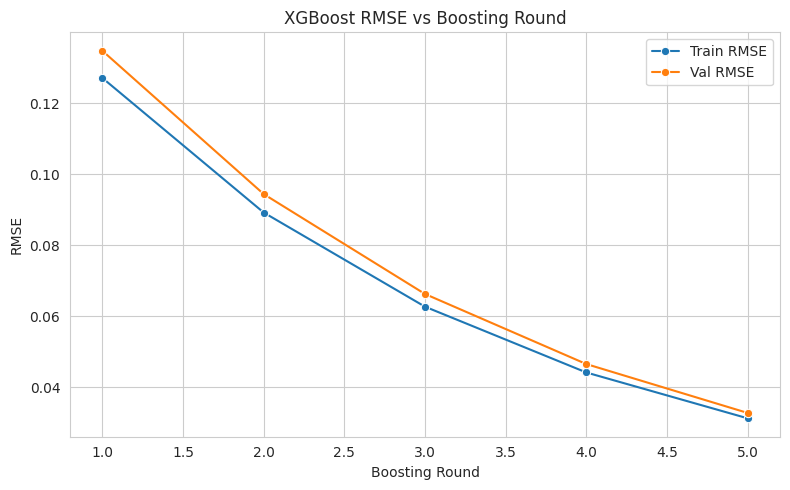

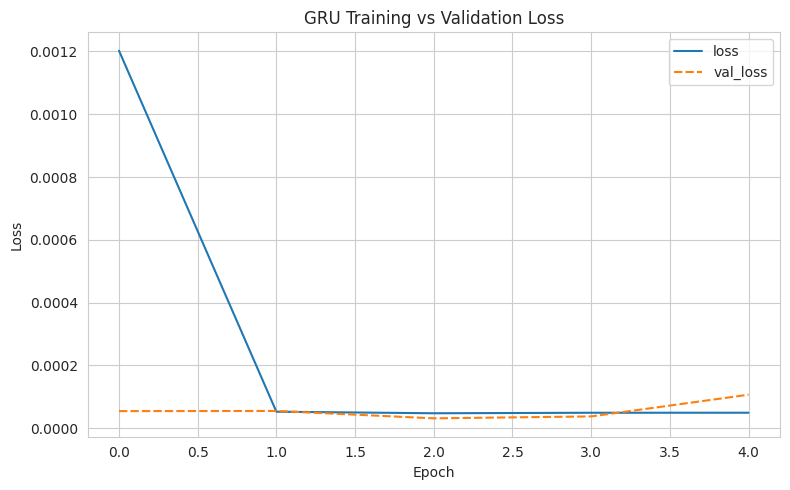

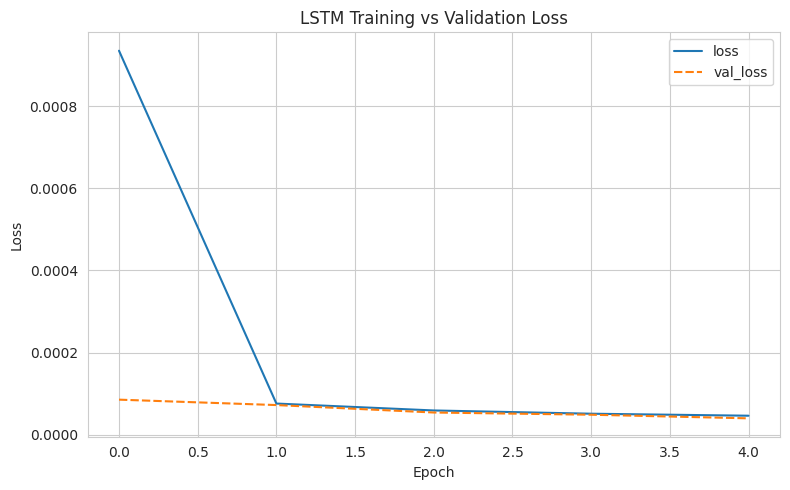

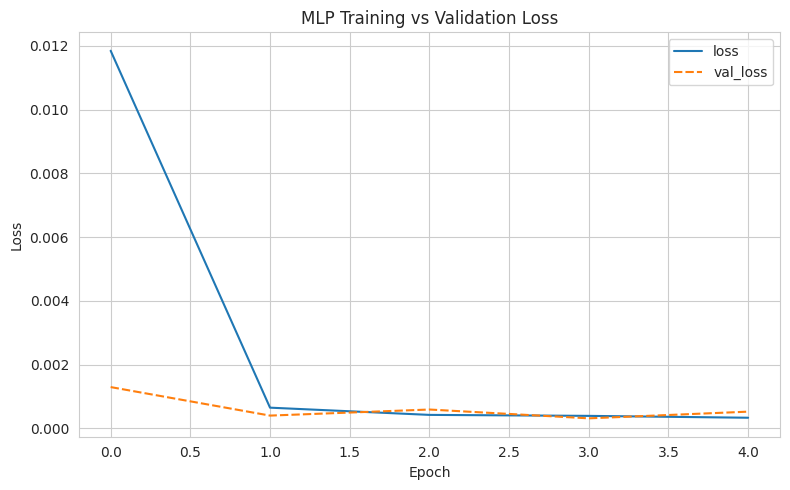

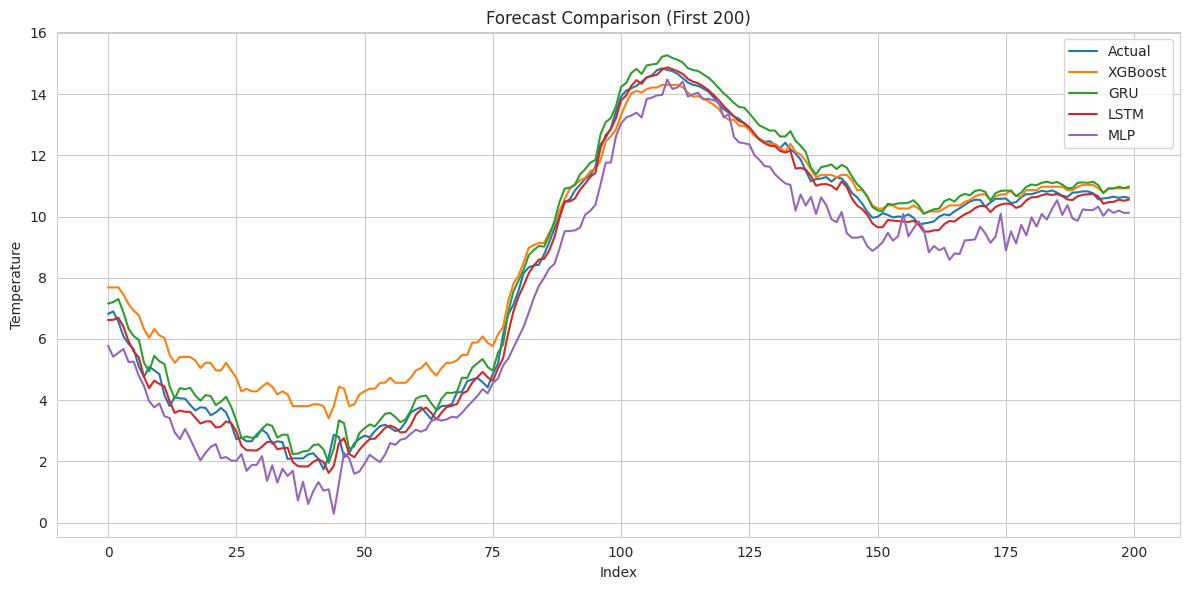

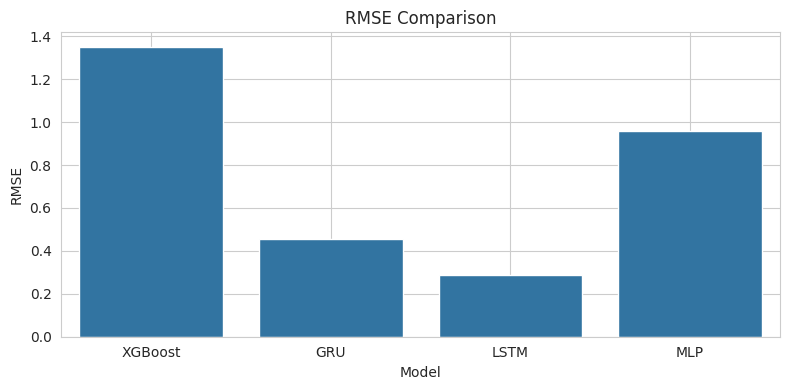

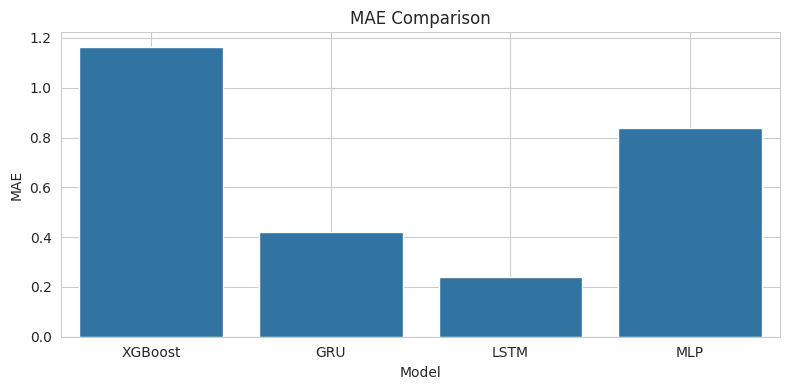

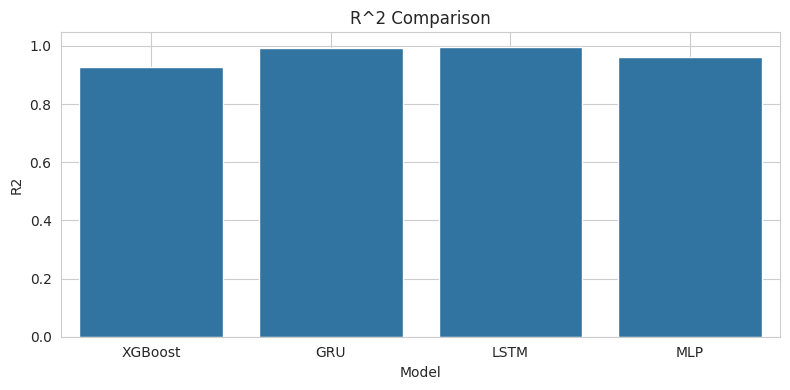

     Model      RMSE       MAE        R2
0  XGBoost  1.350643  1.164520  0.926703
1      GRU  0.453309  0.420389  0.991744
2     LSTM  0.289033  0.238606  0.996643
3      MLP  0.956987  0.838432  0.963202


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Flatten

# Function to load and prepare data
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df['hour'] = df.index.hour
    df['month'] = df.index.month
    df['day'] = df.index.day
    return df

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predict the first column (target)
    return np.array(X), np.array(y)

# 1. Load & prepare data
df = load_and_prepare_data('Data/cleaned_weather.csv')

# 2. Define target & features
target = 'T'
features = [c for c in df.columns if c != target]
df_model = df[[target] + features]

# 3. Scale all features to [0,1]
scalers = {}
df_scaled = df_model.copy()
for col in df_model.columns:
    mms = MinMaxScaler()
    df_scaled[col] = mms.fit_transform(df_model[[col]])
    scalers[col] = mms

data = df_scaled.values

# 4. Create sequences
seq_len = 24
X, y = create_sequences(data, seq_len)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
X_flat_train = X_train.reshape(X_train.shape[0], -1)
X_flat_test = X_test.reshape(X_test.shape[0], -1)
y_test_inv = scalers[target].inverse_transform(y_test.reshape(-1, 1)).ravel()

results = {}

# 6. XGBoost Model
xgb = XGBRegressor(
    n_estimators=5,
    random_state=42,
    verbosity=0,
    eval_metric='rmse'
)
xgb.fit(
    X_flat_train, y_train,
    eval_set=[(X_flat_train, y_train), (X_flat_test, y_test)],
    verbose=False
)
xgb_eval = xgb.evals_result()
p_xgb = xgb.predict(X_flat_test)
p_xgb_inv = scalers[target].inverse_transform(p_xgb.reshape(-1, 1)).ravel()
results['XGBoost'] = {
    'pred': p_xgb_inv,
    'rmse': np.sqrt(mean_squared_error(y_test_inv, p_xgb_inv)),
    'mae': mean_absolute_error(y_test_inv, p_xgb_inv),
    'r2': r2_score(y_test_inv, p_xgb_inv)
}

# 7. GRU Model
model_gru = Sequential([
    GRU(64, input_shape=(seq_len, df_scaled.shape[1])),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
p_gru = model_gru.predict(X_test)
p_gru_inv = scalers[target].inverse_transform(p_gru).ravel()
results['GRU'] = {
    'pred': p_gru_inv,
    'rmse': np.sqrt(mean_squared_error(y_test_inv, p_gru_inv)),
    'mae': mean_absolute_error(y_test_inv, p_gru_inv),
    'r2': r2_score(y_test_inv, p_gru_inv)
}

# 8. LSTM Model
model_lstm = Sequential([
    LSTM(64, input_shape=(seq_len, df_scaled.shape[1])),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
p_lstm = model_lstm.predict(X_test)
p_lstm_inv = scalers[target].inverse_transform(p_lstm).ravel()
results['LSTM'] = {
    'pred': p_lstm_inv,
    'rmse': np.sqrt(mean_squared_error(y_test_inv, p_lstm_inv)),
    'mae': mean_absolute_error(y_test_inv, p_lstm_inv),
    'r2': r2_score(y_test_inv, p_lstm_inv)
}

# 9. MLP Model
model_mlp = Sequential([
    Flatten(input_shape=(seq_len, df_scaled.shape[1])),
    Dense(64, activation='relu'),
    Dense(1)
])
model_mlp.compile(optimizer='adam', loss='mse')
history_mlp = model_mlp.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)
p_mlp = model_mlp.predict(X_test)
p_mlp_inv = scalers[target].inverse_transform(p_mlp).ravel()
results['MLP'] = {
    'pred': p_mlp_inv,
    'rmse': np.sqrt(mean_squared_error(y_test_inv, p_mlp_inv)),
    'mae': mean_absolute_error(y_test_inv, p_mlp_inv),
    'r2': r2_score(y_test_inv, p_mlp_inv)
}

# 10. Plot XGBoost RMSE
plt.figure(figsize=(8, 5))
rounds = list(range(1, len(xgb_eval['validation_0']['rmse']) + 1))
sns.lineplot(x=rounds, y=xgb_eval['validation_0']['rmse'], label='Train RMSE', marker='o')
sns.lineplot(x=rounds, y=xgb_eval['validation_1']['rmse'], label='Val RMSE', marker='o')
plt.title('XGBoost RMSE vs Boosting Round')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Plot RNN model training histories
for name, history in zip(['GRU', 'LSTM', 'MLP'], [history_gru, history_lstm, history_mlp]):
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=pd.DataFrame(history.history))
    plt.title(f'{name} Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 12. Forecast comparison
metrics_df = pd.DataFrame([
    {'Model': m, 'RMSE': v['rmse'], 'MAE': v['mae'], 'R2': v['r2']}
    for m, v in results.items()
])

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(200), y=y_test_inv[:200], label='Actual')
for name, v in results.items():
    sns.lineplot(x=range(200), y=v['pred'][:200], label=name)
plt.title('Forecast Comparison (First 200)')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 13. RMSE, MAE and R2 Bar Charts
plt.figure(figsize=(8, 4))
sns.barplot(data=metrics_df, x='Model', y='RMSE').set_title('RMSE Comparison')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=metrics_df, x='Model', y='MAE').set_title('MAE Comparison')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=metrics_df, x='Model', y='R2').set_title('R^2 Comparison')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final metrics
print(metrics_df)
